### Кластеризация

Кластеризация (или кластерный анализ) — это задача разбиения множества объектов на группы, называемые кластерами. Внутри каждой группы должны оказаться «похожие» объекты, а объекты разных группы должны быть как можно более отличны. (Определение: Ершов К.С., Романова Т.Н.)

Задача кластеризации относится к классу задач обучения без учителя.

Применение кластерного анализа в общем виде сводится к следующим этапам:
 1. Отбор выборки объектов для кластеризации.
 2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости – нормализация значений переменных.
 3. Вычисление значений меры сходства между объектами.
 4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).
 5. Представление результатов анализа.

После получения и анализа результатов возможна корректировка выбранной метрики и метода кластеризации до получения оптимального результата.

Мера сходства из третьего пункта может определяться разным образом, но самое интуитивное (и распространенное) в методах кластеризации - это буквально оценка расстояния между объектами в многомерном пространстве, в котором происходит кластеризация.
Сооттветственно, именно на основании этого расстояния/меры схожести группируются объекты.
Для каждой пары объектов измеряется «расстояние» между ними — степень похожести. 

Существует большое количество различных расстояний. Рассмотрим наиболее часто встречающиеся:
1. **Евклидово расстояние**

Используется чаще всего. Представляет собой геометрическим расстоянием в многомерном пространстве:
$$d_{ij}=\sqrt{\sum_{k=1}^{n}(x_{ik}-x_{jk})^{2}}$$

2. **Квадрат евклидова расстояния**

Применяется для придания большего веса более отдаленным друг от друга объектам. Рассчитывается следующим образом:
$$d_{ij}=\sum_{k=1}^{n}(x_{ik}-x_{jk})^{2}$$

3. **Расстояние городских кварталов (манхэттенское расстояние)**

Это расстояние является средним разностей по координатам. В большинстве случаев эта мера расстояния приводит к таким же результатам, как и для обычного расстояния Евклида. Однако для этой меры влияние отдельных больших разностей (выбросов) уменьшается (т.к. они не возводятся в квадрат). Формула для расчета манхэттенского расстояния:
$$d_{ij}=\sum_{k=1}^{n}\left |x_{ik}-x_{jk}\right |$$

4. **Расстояние Чебышева**

Это расстояние может оказаться полезным, когда нужно определить два объекта как «различные», если они различаются по какой-либо одной координате. Расстояние Чебышева вычисляется по формуле:
$$d_{ij}=max_{k=1...n}\left |x_{ik}-x_{jk}\right |$$

5. **Степенное расстояние**

Применяется в случае, когда необходимо увеличить или уменьшить вес, относящийся к размерности, для которой соответствующие объекты сильно отличаются. Степенное расстояние вычисляется по следующей формуле:
$$d_{ij}=\sqrt[r]{\sum_{k=1}^{n}(x_{ik}-x_{jk})^{p}}$$,
где r и p – параметры, определяемые пользователем. Параметр p ответственен за постепенное взвешивание разностей по отдельным координатам, параметр r ответственен за прогрессивное взвешивание больших расстояний между объектами. Если оба параметра – r и p — равны двум, то это расстояние совпадает с расстоянием Евклида.

Выбор метрики полностью лежит на исследователе, поскольку результаты кластеризации могут существенно отличаться при использовании разных мер.

In [2]:
from sklearn.datasets import make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style()

### K-means

K-means - один из алгоритм машинного обучения, решающий задачу кластеризации. 

Основная идея алгоритма k-means заключается в том, что данные произвольно разбиваются на кластеры, после чего итеративно перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Цель алгоритма заключается в разделении n наблюдений на k кластеров таким образом, чтобы каждое наблюдение принадлежало ровно одному кластеру, расположенному на наименьшем расстоянии от наблюдения.

In [15]:
from my_knn import show_kmeans
from ipywidgets import interact

In [16]:
interact(show_kmeans, step=(0,8,1))

interactive(children=(IntSlider(value=4, description='step', max=8), Output()), _dom_classes=('widget-interact…

<function my_knn.show_kmeans(step)>

In [17]:
# фиксируем размер отображаемых картинок
from pylab import rcParams
rcParams['figure.figsize'] = (9, 8)

In [18]:
#генерируем датасет
#1-й пример
X, y = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.80, random_state=40)
# #2-ой пример
# X, y = make_moons(n_samples=300, noise=0.10, random_state=40)

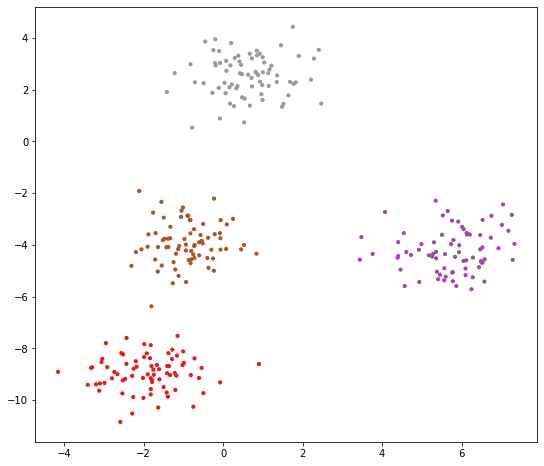

In [19]:
# Getting the values and plotting it
x_1 = X[:, 0]
x_2 = X[:, 1]
X = np.array(list(zip(x_1, x_2)))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', s=10)

In [20]:
def get_clusters(n_clust,  data):
    """
    генерируем заданное колиичество кластеров, для их расположения пользуемся следующей импирикой:
    для того, что бы кластера не находились в большом удалении от данных, 
    расположим их используя нормальное распределение
    """
    ax = np.mean(data, axis=0)
    scale = np.std(X, axis=0)
    clusters = np.random.normal(loc=ax, scale=scale, size=(n_clust, 2))
    return clusters

In [21]:
def show_knn(X, y_pred, clusters):
    """ отрисовка данных для кажддого кластера """
    all_clusters = []
    for cl in range(clusters.shape[0]):
        cluster = np.array([[0, 0]])
        for i in range(X.shape[0]):
            if y_pred[i]==cl:
                cluster = np.append(cluster, np.array([X[i]]), axis=0)
        all_clusters.append(cluster)

    # Plotting along with the Centroids
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(clusters.shape[0]):
        plt.scatter(all_clusters[i][1:, 0], all_clusters[i][1:, 1], s=10, c=colors[i])
        plt.scatter(clusters[i][0], clusters[i][1], marker='*', s=200, c=colors[i])
    plt.show()

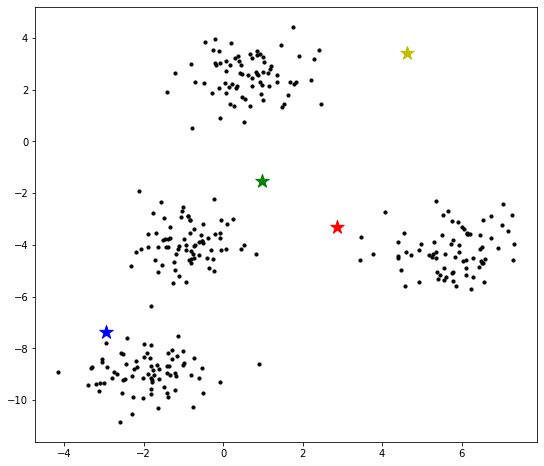

In [22]:
# создаем центроиды наших кластеров
clusters = get_clusters(4, X)

def show_start(clusters):
    """ отрисовка центроидов кластеров """
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.scatter(x_1, x_2, c='#050505', s=10)
    for i in range(clusters.shape[0]):
        plt.scatter(clusters[i][0], clusters[i][1], marker='*', s=200, c=colors[i])
    plt.show()
    

show_start(clusters)

Для нашей реализации Kmeans используем евклидово расстояние

$d_{ij}=\sqrt{\sum_{k=1}^{n}(x_{ik}-x_{jk})^{2}}$

In [23]:
def euclidean_dist(instance1, instance2):
    """расчитываем евклидово расстояние между двумя точками"""
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    return np.sqrt(sum((instance1 - instance2)**2))

In [24]:
def update_y_pred(X, clusters, y_pred):
    """
    назначаем каждому примеру данных значение ближайшего центра кластера
    parameters:
    X - данные
    clusters - центроиды кластеров
    y_pred - принадлежность примера, кластеру
    """
    for i in range(X.shape[0]):
        old_dist = 9e12
        for num, cl in zip(range(clusters.shape[0]), clusters):
            distance = euclidean_dist(X[i], cl)
            if distance < old_dist:
                y_pred[i] = num
                old_dist = distance
    return y_pred


def update_clusters(X, clusters, y_pred):
    """
    перемещаем кластер в центр масс данных, приинадлежащих этому же кластеру
    parameters:
    X - данные
    clusters - центроиды кластеров
    y_pred - принадлежность примера, кластеру
    """
    for clust in range(clusters.shape[0]):
        list_cluster = []
        for i in range(X.shape[0]):
            if y_pred[i] == clust:
                list_cluster.append(X[i])
        if len(list_cluster) > 0:
            clusters[clust] = np.mean(list_cluster, axis=0)
    return clusters

In [25]:
# обучаем модель пока разница между центрами кластеров на n-ом шаге не будет равна на n+1 шаге
y_pred = np.zeros_like(y)
steps = {}

step = 1

clusters_old = np.zeros_like(clusters)
while abs((clusters - clusters_old).sum())>=0.01:
    clusters_old = clusters.copy()
    #definds clusters for each points
    y_pred = update_y_pred(X, clusters, y_pred)
    steps[step] = [y_pred.copy(), clusters.copy()] # фиксируем данные для визуализации
    step += 1

    # updates centroid of clusters
    clusters = update_clusters(X, clusters, y_pred)
    steps[step] = [y_pred.copy(), clusters.copy()] # фиксируем данные для визуализации
    step += 1

In [26]:
from ipywidgets import interact

def show_step(step):
    if step == 0:
        show_start(steps[1][1])
    else:
        show_knn(X, steps[step][0], steps[step][1])
    
    
interact(show_step, step=(0,8,1))

interactive(children=(IntSlider(value=4, description='step', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.show_step(step)>